In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data =  pd.read_csv("weather_1979_2020.csv")

In [3]:
data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,-21600,Memphis,35.149534,-90.04898,51.01,40.71,41.00,63.31,...,310,0.5,NaN,NaN,NaN,90,520,Rain,light intensity shower rain,09n
1,284000400,1979-01-01 01:00:00 +0000 UTC,-21600,Memphis,35.149534,-90.04898,47.53,40.35,41.00,61.11,...,320,NaN,NaN,NaN,NaN,90,741,Fog,fog,50n
2,284004000,1979-01-01 02:00:00 +0000 UTC,-21600,Memphis,35.149534,-90.04898,45.72,37.62,41.00,57.22,...,320,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
3,284007600,1979-01-01 03:00:00 +0000 UTC,-21600,Memphis,35.149534,-90.04898,43.34,37.51,42.08,48.87,...,340,1.0,NaN,NaN,NaN,90,500,Rain,light rain,10n
4,284011200,1979-01-01 04:00:00 +0000 UTC,-21600,Memphis,35.149534,-90.04898,42.80,36.88,42.08,45.99,...,340,1.0,NaN,NaN,NaN,90,500,Rain,light rain,10n


# drop duplicate

In [4]:
data.shape

(390089, 25)

In [5]:
data=data.sort_values(['dt_iso','weather_main']).drop_duplicates(['dt_iso'],keep='last')

In [6]:
data.shape

(366264, 25)

## time column: dt_iso

In [7]:
a=data['dt_iso'].str.split(pat="-",n=2,expand=True)
data['month']=a[1]
data['year']=a[0]
data['year']=pd.to_numeric(data['year'])

In [8]:
b=a[2].str.split(pat=' ',n=2,expand=True)[1]
data['hour']=b.str.split(pat=':', n=1,expand=True)[0]
data['hour']=pd.to_numeric(data['hour'])

## target column - next 3 hour

In [9]:
data['weather_main']=np.where(data['weather_main']=='Thunderstorm',1,0) 
data['weather_main'].value_counts()

0    362317
1      3947
Name: weather_main, dtype: int64

In [10]:
data['weather_description']=np.where(data['weather_description']=='thunderstorm with heavy rain',1,0) 
data['weather_description'].value_counts()

0    365991
1       273
Name: weather_description, dtype: int64

In [11]:
data['th_3']=data['weather_main'].shift(-3, fill_value=0)

In [12]:
data['th_rain_3']=data['weather_description'].shift(-3,fill_value=0)

## drop columns

In [13]:
data.drop(['dt_iso','dt','timezone','city_name','lat','lon',
           'sea_level','grnd_level','weather_id','weather_icon'],axis=1,inplace=True)

In [14]:
data = data.fillna(0)

In [15]:
data.shape

(366264, 20)

In [16]:
data.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,month,year,hour,th_3,th_rain_3
0,51.01,40.71,41.00,63.31,1015,79,16.11,310,0.5,0.0,0.0,0.0,90,0,0,01,1979,0,0,0
1,47.53,40.35,41.00,61.11,1016,78,9.17,320,0.0,0.0,0.0,0.0,90,0,0,01,1979,1,0,0
2,45.72,37.62,41.00,57.22,1017,79,10.29,320,0.0,0.0,0.0,0.0,90,0,0,01,1979,2,0,0
3,43.34,37.51,42.08,48.87,1017,82,5.82,340,1.0,0.0,0.0,0.0,90,0,0,01,1979,3,0,0
4,42.80,36.88,42.08,45.99,1017,82,5.82,340,1.0,0.0,0.0,0.0,90,0,0,01,1979,4,0,0


In [20]:
data.describe()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,year,hour,th_3,th_rain_3
count,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000,366264.000000
mean,61.987917,58.739977,60.108794,63.714297,1017.684146,67.238219,8.180648,171.357507,0.137062,0.038144,0.002538,0.000765,47.155705,0.010776,0.000745,1999.392897,11.500000,0.010776,0.000745
std,17.823599,22.247200,17.747057,17.931380,6.119976,18.405299,4.154390,100.883095,0.947622,0.742238,0.070397,0.065242,36.794072,0.103249,0.027291,12.061607,6.922196,0.103249,0.027291
min,-6.480000,-21.240000,-9.000000,-5.220000,956.000000,12.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1979.000000,0.000000,0.000000,0.000000
25%,48.310000,40.960000,46.400000,50.000000,1014.000000,53.000000,4.700000,90.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1989.000000,5.750000,0.000000,0.000000
50%,64.150000,60.240000,62.440000,66.020000,1017.000000,69.000000,6.930000,180.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1999.000000,11.500000,0.000000,0.000000
75%,75.940000,77.610000,73.940000,78.072500,1021.000000,82.000000,10.290000,237.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,2010.000000,17.250000,0.000000,0.000000
max,105.030000,110.010000,104.000000,107.600000,1047.000000,100.000000,46.080000,360.000000,50.800000,60.800000,7.900000,14.000000,100.000000,1.000000,1.000000,2020.000000,23.000000,1.000000,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366264 entries, 0 to 390088
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temp                 366264 non-null  float64
 1   feels_like           366264 non-null  float64
 2   temp_min             366264 non-null  float64
 3   temp_max             366264 non-null  float64
 4   pressure             366264 non-null  int64  
 5   humidity             366264 non-null  int64  
 6   wind_speed           366264 non-null  float64
 7   wind_deg             366264 non-null  int64  
 8   rain_1h              366264 non-null  float64
 9   rain_3h              366264 non-null  float64
 10  snow_1h              366264 non-null  float64
 11  snow_3h              366264 non-null  float64
 12  clouds_all           366264 non-null  int64  
 13  weather_main         366264 non-null  int32  
 14  weather_description  366264 non-null  int32  
 15  month            

## corr

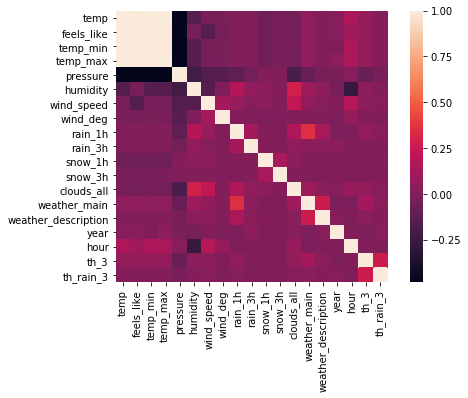

In [22]:
f, ax = plt.subplots(figsize=(8, 5))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  square=True, ax=ax)

## distribution

In [23]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [24]:
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='weather_main' and var!='weather_description']
print(f'There are {len(continuous)} continuous variables')

There are 17 continuous variables


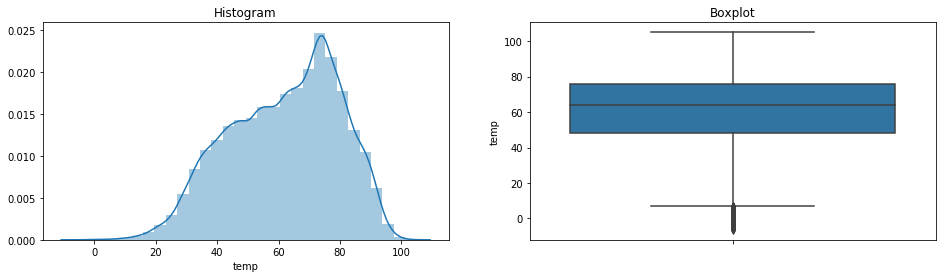

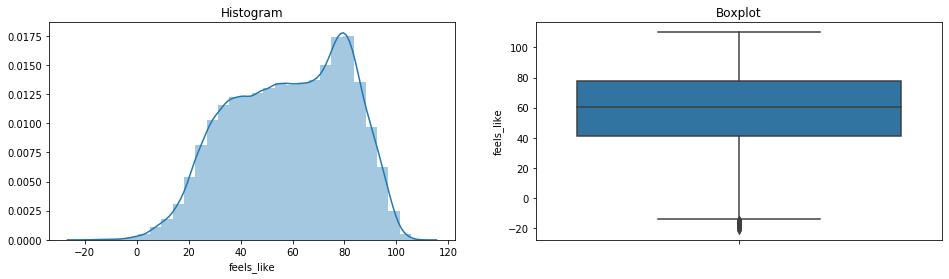

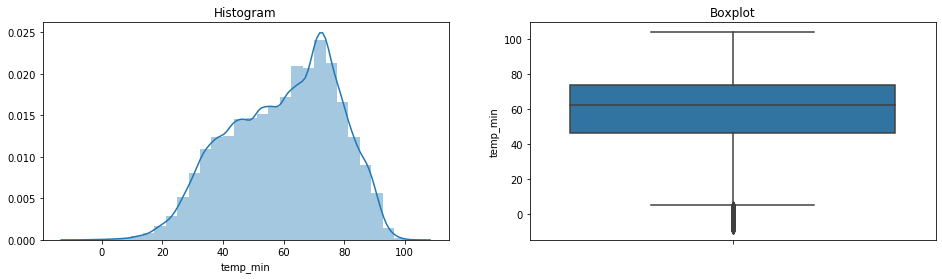

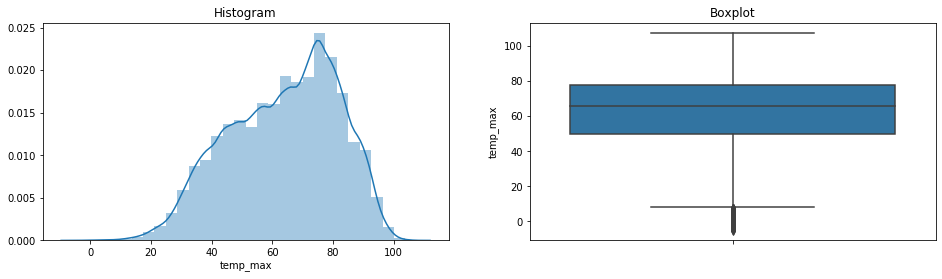

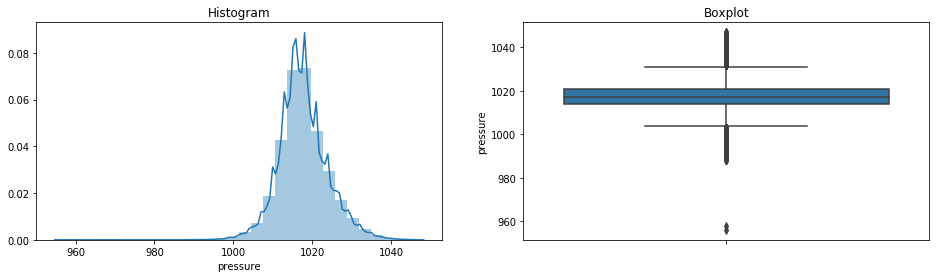

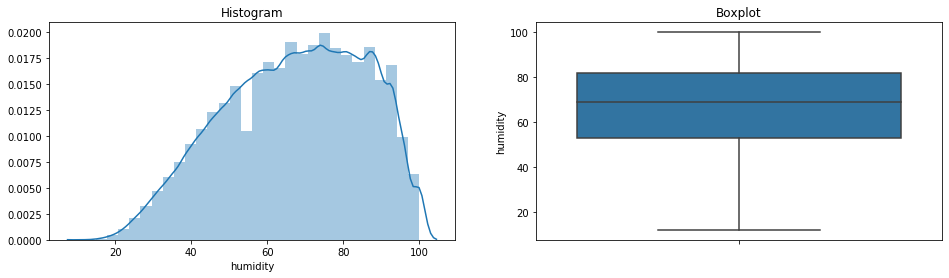

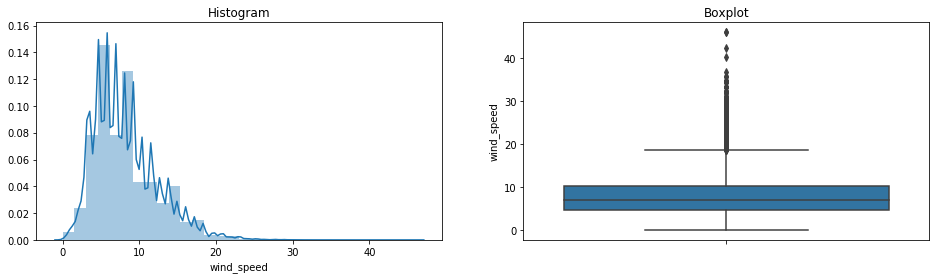

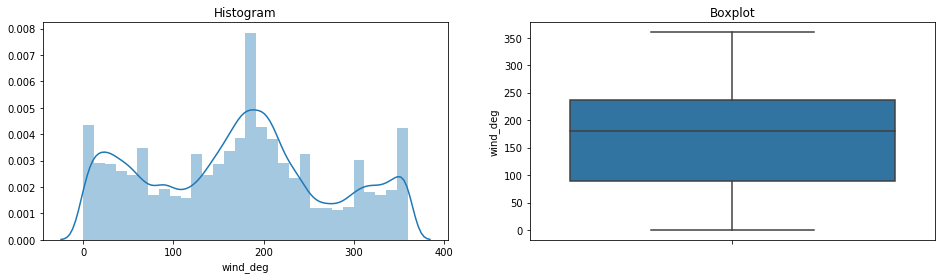

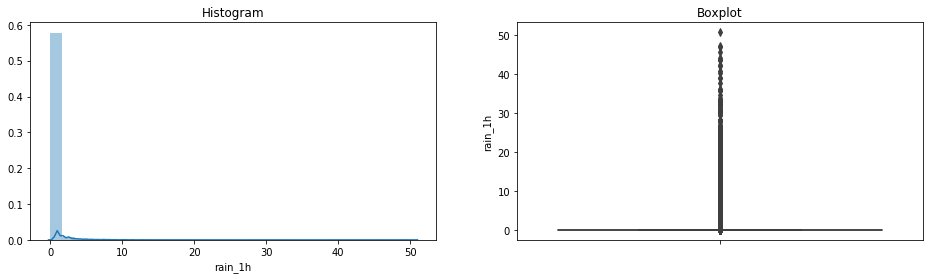

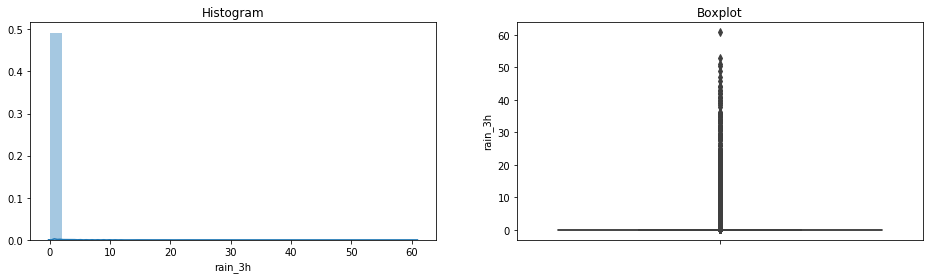

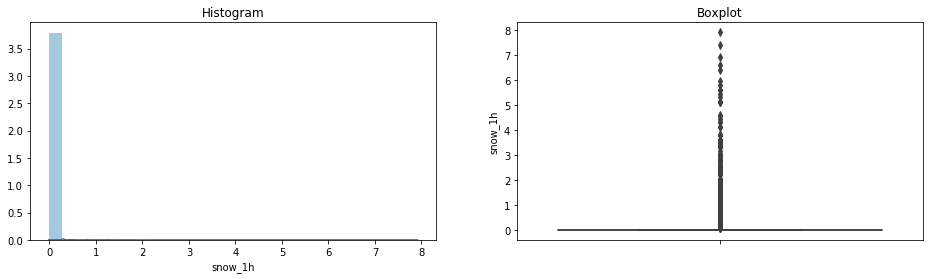

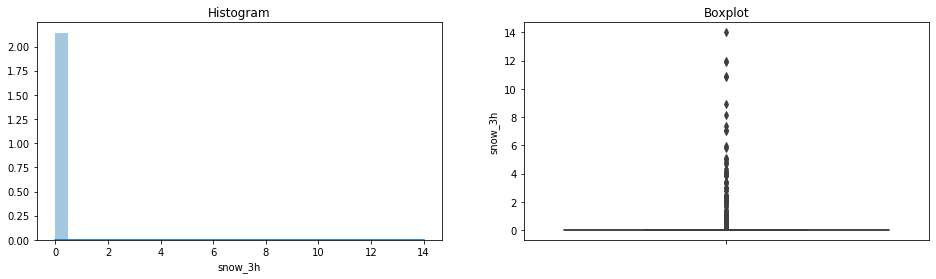

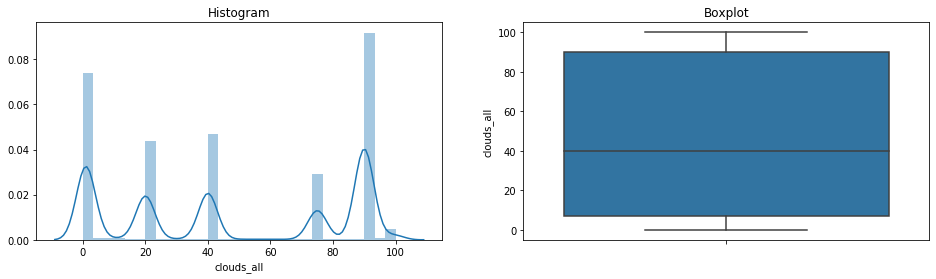

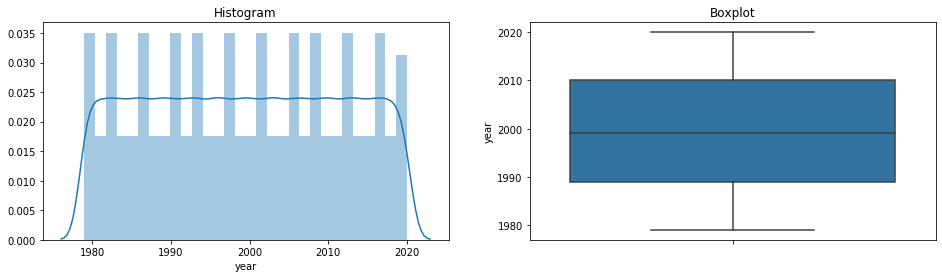

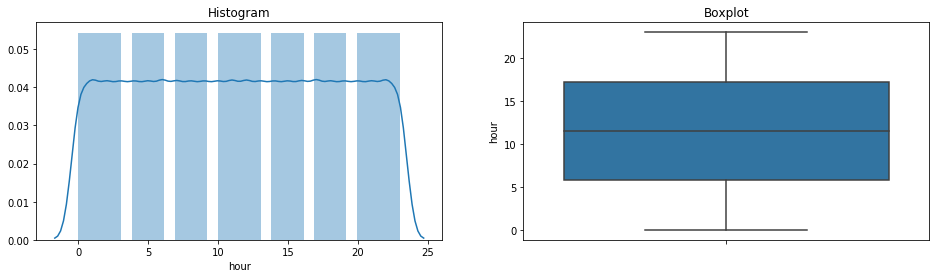

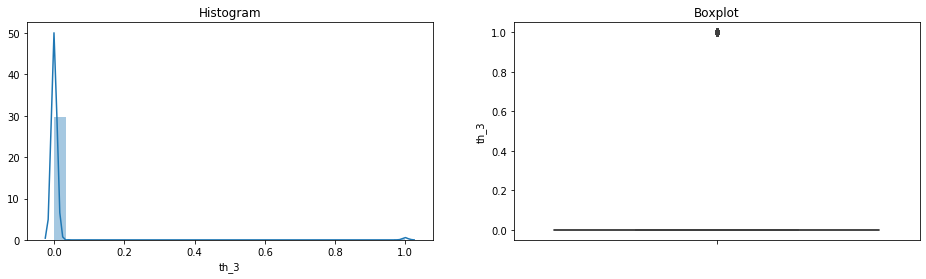

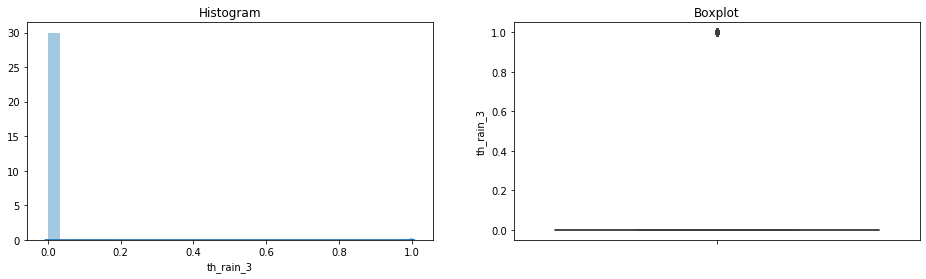

In [25]:
for var in continuous:
    diagnostic_plots(data, var)

# PreProcessing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# target- 3h early- thunderstorm
X_train, X_test, y_train, y_test = train_test_split(data.drop(['th_3','th_rain_3'], axis=1),
                                                   data['th_3'],
                                                   test_size=0.2,
                                                   random_state=0)
X_train.shape, X_test.shape

((293011, 18), (73253, 18))

In [28]:
#target- 3h early- thunderstorm with heavy rain
X_train, X_test, y_train, y_test = train_test_split(data.drop(['th_3','th_rain_3'], axis=1),
                                                   data['th_rain_3'],
                                                   test_size=0.2,
                                                   random_state=0)
X_train.shape, X_test.shape

((293011, 18), (73253, 18))

In [20]:
from sklearn.pipeline import Pipeline
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import RobustScaler

In [21]:
data_pipeline = Pipeline([
    
    #categorial encoding
    ('month', ce.OneHotCategoricalEncoder(variables =['month'])),

    # feature Scaling
    ('scale',RobustScaler())

])

In [22]:
data_pipeline.fit(X_train,y_train)

Pipeline(steps=[('month', OneHotCategoricalEncoder(variables=['month'])),
                ('scale', RobustScaler())])

In [23]:
X_train=data_pipeline.transform(X_train)
X_test=data_pipeline.transform(X_test)

# model

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [35]:
import sklearn.metrics as metrics

## Data Sampling Algorithms

In [38]:
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.under_sampling import RandomUnderSampler

## XgBoost

In [37]:
from xgboost import XGBClassifier

## 3h early-thunderstorm-ROC_AUC

In [74]:
pipe_roc_xgb = Pipeline_imb([('under',RandomUnderSampler(sampling_strategy=0.5)),
                             ('xgb',XGBClassifier(random_state=42,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 5,
                                                                            booster='dart'
                                                                             ))])
param_xgb = {'xgb__learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
             }

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_xgb, cv=5, n_jobs=2,scoring = 'roc_auc')
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(ogrid_xgb.best_score_))
print(f'Train score is {ogrid_xgb.score(X_train,y_train)}')
print(f'test score is {ogrid_xgb.score(X_test,y_test)}')

Best parameters: {'xgb__learning_rate': 0.1}
Best Mean cross-validation score: 0.89162
Train score is 0.9190070653645104
test score is 0.8897459183292851


In [75]:
# let's get the predictions
X_test_preds = ogrid_xgb.predict(X_test)
print(classification_report(y_test, X_test_preds))
print('test_Accuracy', accuracy_score(y_test, X_test_preds))
print('test_ROC AUC score:', roc_auc_score(y_test, X_test_preds))
print('test_ROC AUC proba_score:',roc_auc_score(y_test==1,ogrid_xgb.predict_proba(X_test)[:,1]))
print('test_f1 score:', f1_score(y_test, X_test_preds))
print('test_f2 score:', fbeta_score(y_test, X_test_preds,beta=2))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     72459
           1       0.05      0.73      0.10       794

    accuracy                           0.85     73253
   macro avg       0.52      0.79      0.51     73253
weighted avg       0.99      0.85      0.91     73253

test_Accuracy 0.853371192988683
test_ROC AUC score: 0.7919753924594132
test_ROC AUC proba_score: 0.8897459183292851
test_f1 score: 0.09731910244558366
test_f2 score: 0.20271689657587003


In [76]:
confusion = metrics.confusion_matrix(y_test, X_test_preds)
print(f"Confusion matrix:\n{confusion}")

Confusion matrix:
[[61933 10526]
 [  215   579]]


In [77]:
%matplotlib inline
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

In [78]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

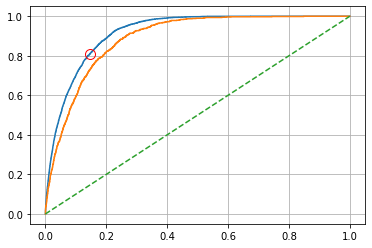

In [79]:
fpr, recall, threshold = roc_curve(y_train, ogrid_xgb.predict_proba(X_train)[:,1])
plt.subplots()
plt.plot(fpr, recall)

zero_index = np.argmin(np.abs(threshold-0.5))
plt.plot(fpr[zero_index], recall[zero_index], c = 'red', label = 'Default threshold', 
         fillstyle = 'none', markersize = 10, marker = 'o')


fpr2, recall2, threshold2 = roc_curve(y_test, ogrid_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr2, recall2)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')


plt.grid()

## 3h early-thunderstorm with heavy rain

In [96]:
pipe_roc_xgb = Pipeline_imb([('under',RandomUnderSampler(sampling_strategy=0.5)),
                             ('xgb',XGBClassifier(random_state=42,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 5,
                                                                            booster='dart'
                                                                             ))])
param_xgb = {'xgb__learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
             }

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_xgb, cv=5, n_jobs=2,scoring = 'roc_auc')
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(ogrid_xgb.best_score_))
print(f'Train score is {ogrid_xgb.score(X_train,y_train)}')
print(f'test score is {ogrid_xgb.score(X_test,y_test)}')

Best parameters: {'xgb__learning_rate': 0.2}
Best Mean cross-validation score: 0.91470
Train score is 0.977992938278058
test score is 0.91785418630384


In [97]:
# let's get the predictions
X_test_preds = ogrid_xgb.predict(X_test)
print(classification_report(y_test, X_test_preds))
print('test_Accuracy', accuracy_score(y_test, X_test_preds))
print('test_ROC AUC score:', roc_auc_score(y_test, X_test_preds))
print('test_ROC AUC proba_score:',roc_auc_score(y_test==1,ogrid_xgb.predict_proba(X_test)[:,1]))
print('test_f1 score:', f1_score(y_test, X_test_preds))
print('test_f2 score:', fbeta_score(y_test, X_test_preds,beta=2))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     73203
           1       0.00      0.78      0.01        50

    accuracy                           0.89     73253
   macro avg       0.50      0.83      0.47     73253
weighted avg       1.00      0.89      0.94     73253

test_Accuracy 0.885752119367125
test_ROC AUC score: 0.8329121757305029
test_ROC AUC proba_score: 0.91785418630384
test_f1 score: 0.00923404759086066
test_f2 score: 0.02268233104571362


In [86]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

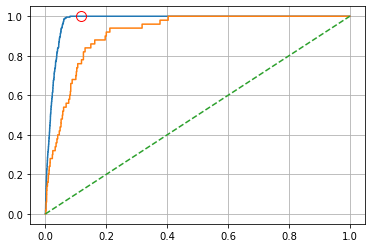

In [87]:
fpr, recall, threshold = roc_curve(y_train, ogrid_xgb.predict_proba(X_train)[:,1])
plt.subplots()
plt.plot(fpr, recall)

zero_index = np.argmin(np.abs(threshold-0.5))
plt.plot(fpr[zero_index], recall[zero_index], c = 'red', label = 'Default threshold', 
         fillstyle = 'none', markersize = 10, marker = 'o')


fpr2, recall2, threshold2 = roc_curve(y_test, ogrid_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr2, recall2)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')


plt.grid()